# Coronary Heart Disease


A retrospective sample of males in a heart-disease high-risk region
of the Western Cape, South Africa. There are roughly two controls per
case of CHD. Many of the CHD positive men have undergone blood
pressure reduction treatment and other programs to reduce their risk
factors after their CHD event. In some cases the measurements were
made after these treatments. These data are taken from a larger
dataset, described in  Rousseauw et al, 1983, South African Medical
Journal. 

- *sbp*	-	systolic blood pressure
- *tobacco*	-	cumulative tobacco (kg)
- *ldl*	-	low densiity lipoprotein cholesterol
- *adiposity* - https://en.m.wikipedia.org/wiki/Body_adiposity_index
- *famhist*	-	family history of heart disease (Present, Absent)
- *typea*	-	type-A behavior
- *obesity* - https://en.wikipedia.org/wiki/Obesity
- *alcohol*	-	current alcohol consumption
- *age*	-	age at onset
- *chd*	-	response, coronary heart disease

The dataset is taken from 

http://www-stat.stanford.edu/~tibs/ElemStatLearn/datasets/SAheart.data

Description is available at

https://web.stanford.edu/~hastie/ElemStatLearn/datasets/SAheart.info.txt

### Step 1: Loading the dataset

- Load the data file SAheart.data. This is csv file.

### Stpe 2: Finding Metadata 

- Find how many rows and columns available in the dataset.
- Find the columns types of the dataset.

### Step 4: Encode the categorical variable *famhist* using OHE (One Hot Encoding)

### Step 5: Split the dataset into train and test 

Note: Split using 80:20 rule. Use random_state value 100.


### Step 6: Build a Classification Model

Note: Use any one of the following models:

1. Logistic Regression
2. KNN
3. Decision Tree

### Step 7: Predict on the test set to find the predicted probability for *chd* classes

### Step 8: Find the ROC AUC Score

### Step 9: Find the optimal probabililty cutoff using the following costs for FPs and FNs

- FP_Cost = 1.0
- FN_Cost = 1.0

Note: The cost for false positive and false negatives are same.

### Step 10: Predict the labels on test set using the optimal cutoff probability value.

Note: Use the cutoff probability to predict if the person is likely to have chd or not.


### Step 11: Create confusion matrix

### Step 12: Find the Precision and recall for the *chd* classes.

Step 1: Loading the dataset

In [1]:
import pandas as pd

In [72]:
heart_df = pd.read_csv('../data/SAheart.data')

Stpe 2: Finding Metadata

In [3]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 11 columns):
row.names    462 non-null int64
sbp          462 non-null int64
tobacco      462 non-null float64
ldl          462 non-null float64
adiposity    462 non-null float64
famhist      462 non-null object
typea        462 non-null int64
obesity      462 non-null float64
alcohol      462 non-null float64
age          462 non-null int64
chd          462 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 39.8+ KB


In [5]:
heart_df.shape

(462, 11)

Step 3: Print Records

In [6]:
heart_df[0:5]

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [7]:
heart_df[-5:]

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
457,459,214,0.4,5.98,31.72,Absent,64,28.45,0.00,58,0
458,460,182,4.2,4.41,32.10,Absent,52,28.61,18.72,52,1
459,461,108,3.0,1.59,15.23,Absent,40,20.09,26.64,55,0
460,462,118,5.4,11.61,30.79,Absent,64,27.35,23.97,40,0
461,463,132,0.0,4.82,33.41,Present,62,14.70,0.00,46,1


In [10]:
heart_df[['sbp','ldl','chd']][10:21]

,sbp,ldl,chd
10,206,2.95,1
11,134,4.44,1
12,118,1.88,0
13,132,1.87,0
14,112,2.29,0
15,117,2.44,0
16,120,15.33,0
17,146,8.29,1
18,158,7.46,1
19,124,6.23,1


Step 4: How many persons have chd and no chd in the dataset?

In [13]:
heart_df['chd'].unique()

array([1, 0], dtype=int64)

In [14]:
heart_df['chd'].value_counts()

0    302
1    160
Name: chd, dtype: int64

In [16]:
heart_df['chd'].value_counts(normalize = True) * 100

0    65.367965
1    34.632035
Name: chd, dtype: float64

Step 5: Does famhist have any impact on chd?

In [17]:
import matplotlib.pyplot as plt
import seaborn as sn

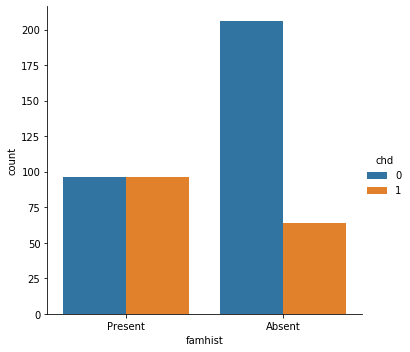

In [21]:
sn.catplot(data = heart_df,
          x = 'famhist',
          kind = 'count',
          hue = 'chd');

Absent in Famhist increase chances on no CHD

Step 6: Is there any difference in alcohol consumption pattern between persons having chd and persons having no chd?

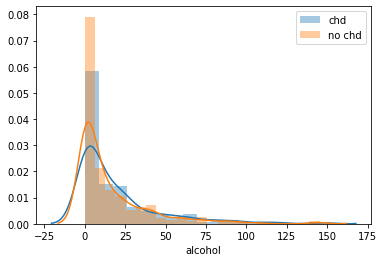

In [25]:
sn.distplot(heart_df[heart_df.chd == 1]['alcohol'], label = 'chd')
sn.distplot(heart_df[heart_df.chd == 0]['alcohol'], label = 'no chd')
plt.legend();

Almost no difference

Step 7: Does age has any impact on chd?

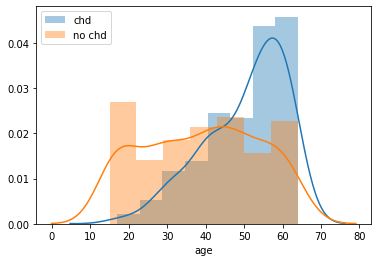

In [27]:
sn.distplot(heart_df[heart_df.chd == 1]['age'], label = 'chd')
sn.distplot(heart_df[heart_df.chd == 0]['age'], label = 'no chd')
plt.legend();

Usually age is more when you have CHD

Step 8: Create a column called "has_famhist" and set to 1 if the person has famhist "Present" or set to 0 if the person has famhist "Absent"

In [28]:
heart_df['has_famhist'] = (heart_df
                        .famhist
                        .map(lambda x: 1 if x=='Present' else 0 ))

In [32]:
heart_df[['has_famhist','famhist']][0:10]

,has_famhist,famhist
0,1,Present
1,0,Absent
2,1,Present
3,1,Present
4,1,Present
5,1,Present
6,0,Absent
7,1,Present
8,1,Present
9,1,Present


Step 9: Are ldl and obesity correlated? Do they have positive or negative correlation?

In [33]:
heart_df[['ldl','obesity']].corr()

,ldl,obesity
ldl,1.000000,0.330506
obesity,0.330506,1.000000


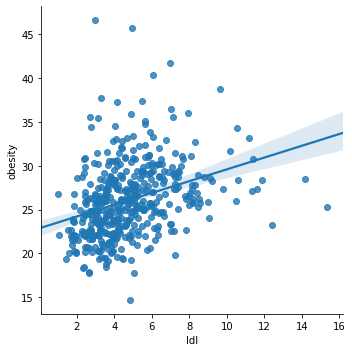

In [34]:
sn.lmplot( data = heart_df,
         x = 'ldl',
         y = 'obesity');

Positive Correleation

Step 10: Create a heatmap between the following variables?
- ldl
- obeisity
- tobacco
- age
- sbp
- typea
Infer which two variables are most correlated?

In [35]:
corr_mat = heart_df[['ldl','obesity','tobacco','age','sbp','typea']].corr()

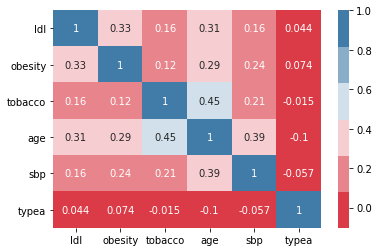

In [36]:
sn.heatmap(corr_mat,
          annot = True,
          cmap = sn.diverging_palette(10,240));

Age and Tobacco strongly correlated

Step 11: What is the range of ldl and sbp for 95% of people suffering from chd?

In [37]:
from scipy import stats

In [39]:
stats.norm.interval(0.95,
                   heart_df[heart_df.chd == 1].ldl.mean(),
                   heart_df[heart_df.chd == 1].ldl.std())

(1.1268745781411615, 9.84900042185884)

In [40]:
stats.norm.interval(0.95,
                   heart_df[heart_df.chd == 1].sbp.mean(),
                   heart_df[heart_df.chd == 1].sbp.std())

(97.3305157486581, 190.1444842513419)

Step 12: Are the age of some people suffering from chd seem abnormal i.e. very low age?

In [45]:
heart_df[heart_df.chd == 1].age.mean()

50.29375

In [64]:
heart_df[heart_df.chd == 1].age.std()

10.649118943684005

In [71]:
chd_df = heart_df[heart_df.chd == 1]
val = (chd_df.age.mean() - 3*chd_df.age.std())

In [66]:
val

18.346393168947987

In [70]:
chd_df[chd_df.age< val ]

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
260,261,118,0.0,2.39,12.13,Absent,49,18.46,0.26,17,1
